In [1]:
%pylab nbagg
from tvb.simulator.lab import *
import pandas as pd
import h5py

Populating the interactive namespace from numpy and matplotlib


In [2]:
#depressed brain 
Q_health = np.repeat(1, 76)
oscilator = models.WilsonCowan(Q = Q_health)

In [3]:
white_matter = connectivity.Connectivity.from_file()
white_matter.speed = numpy.array([3.0])

WARNING  File 'hemispheres' not found in ZIP.


In [4]:
white_matter_coupling = coupling.Linear(a=numpy.array([0.0039]))

In [5]:
#Initialise some Monitors with period in physical time
mon_raw = monitors.Raw(period = 0.9765625)
mon_tavg = monitors.TemporalAverage(period=1)

#Bundle them
what_to_watch = (mon_raw, mon_tavg)

In [6]:
#important variables of dataset
sample_period = 0.0009765625 #seconds         
sf = 1/sample_period #sampling frequency 
sample_rate = 1024

#sns.set(font_scale=1.2)
dt = 0.01

In [7]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/DATA")
#import connectivity file to know which region corresponds to which index in the matrices
filename = "Connectivity.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    regions_list = list(f['region_labels'])

regions = np.array(regions_list)


Keys: <KeysViewHDF5 ['areas', 'centres', 'cortical', 'hemispheres', 'orientations', 'region_labels', 'tract_lengths', 'weights']>


1
check1
check2


<IPython.core.display.Javascript object>


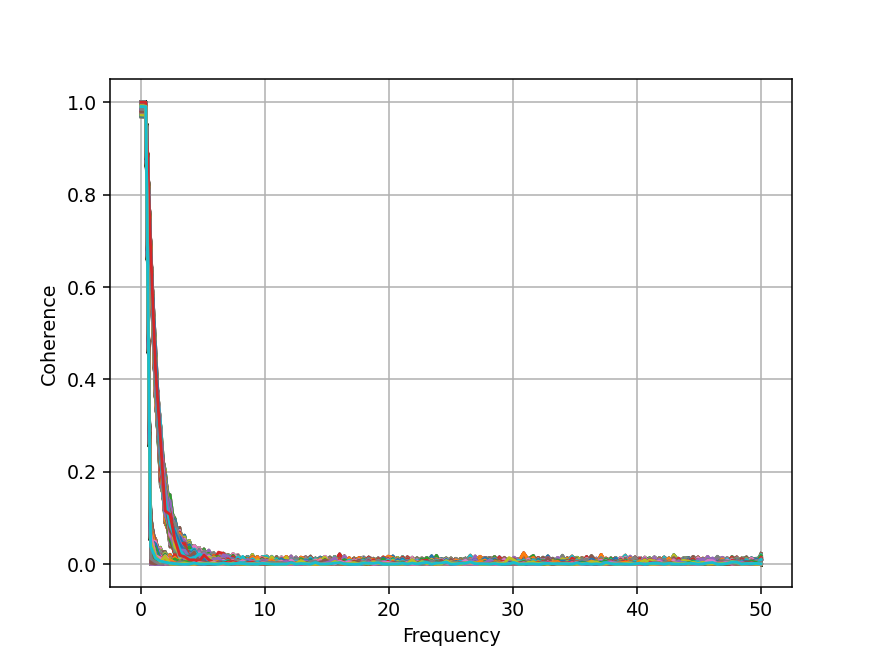

2
check1
check2
3
check1
check2
4
check1
check2
5
check1
check2
6
check1
check2
7
check1
check2
8
check1
check2
9
check1
check2
10
check1
check2
11
check1
check2
12
check1
check2
13
check1
check2
14
check1
check2
15
check1
check2
16
check1
check2
17
check1
check2
18
check1
check2
19
check1
check2
20
check1
check2
21
check1
check2
22
check1
check2
23
check1
check2
24
check1
check2
25
check1
check2
26
check1
check2
27
check1
check2
28
check1
check2
29
check1
check2
30
check1
check2
31
check1
check2
32
check1
check2
33
check1
check2
34
check1
check2
35
check1
check2
36
check1
check2
37
check1
check2
38
check1
check2
39
check1
check2
40
check1
check2
41
check1
check2
42
check1
check2
43
check1
check2
44
check1
check2
45
check1
check2
46
check1
check2
47
check1
check2
48
check1
check2
49
check1
check2
50
check1
check2
51
check1
check2
52
check1
check2
53
check1
check2
54
check1
check2
55
check1
check2
56
check1
check2
57
check1
check2
58
check1
check2
59
check1
check2
60
check1
check2
61
ch

In [11]:
#loop  start om 9u56
mydir = "C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs"

c1 = np.repeat("", 1)
c2 = np.repeat("",1)

ROI_base = numpy.zeros(shape=(1,2))
ROI_ar = np.column_stack([c1, c2, ROI_base])
ROI_tot= np.column_stack([c1, c2, ROI_base])
varkeep = {}
varhigh = {}
varall = {}
TSkeep = {}
leftDLPFC_keep = {}
rightDLPFC_keep = {}

indices = [7,  13, 15, 16, 17,18, 19, 20, 21, 30, 31, 33,35, 36, 45, 51, 53, 54, 55, 56, 57, 58, 59, 68, 69, 71 , 73,74]
NS_arr = np.arange(0,26, 0.25)

counter = 0
loop = 1

nsubs = 101

for i in range(nsubs): 
    if i == 0:
        pass 
    else:
        value = 10**-6 #noise dispertion
        NS = NS_arr[i] #changing noise seed
        print(loop)
        
        #create simulator 
        sim = simulator.Simulator(model = oscilator, connectivity = white_matter,
                          coupling = white_matter_coupling, 
                          integrator = integrators.EulerStochastic(dt=0.01220703125, noise=noise.Additive(noise_seed = int(NS), nsig=numpy.array([value]))),
                        monitors =  what_to_watch)

        sim.configure()

        print("check1")
        
        #Perform the simulation
        raw_data = []
        raw_time = []

        for raw, tavg in sim(simulation_length=2500):
            if not raw is None:
                raw_time.append(raw[0])
                raw_data.append(raw[1])
    
        #Make the lists numpy.arrays for easier use.
        RAW = numpy.array(raw_data)
        RAW_real = RAW[:, 0, :, 0]
        
        print("check2")
        
        
        #save average time series (across regions)
        AV = RAW_real
        AV_ar = AV.mean(axis = 1) 
        TSkeep["data" + str(i)] = AV_ar
        
        #save time series of left DLPFC (for alpha asymmetry later)
        leftDLPFC = RAW_real[:,56]
        leftDLPFC_keep["data" + str(i)] = leftDLPFC

        #save time series of right DLPFC (for alpha asymmetry later)
        rightDLPFC = RAW_real[:,18]
        rightDLPFC_keep["data"+str(i)] = rightDLPFC
        
        counter = 0
        PSDcount = False
        for ROI1 in indices:
            for ROI2 in indices:
                if ROI1 == ROI2:
                    pass
                elif ROI1 > ROI2:
                    pass
                else:
                    x = RAW_real[:,ROI1]
                    y = RAW_real[:,ROI2]
                    
                    #delete the first 500ms
                    list_deleterows = [*range(0,46000,1)]
                    x = np.delete(x, list_deleterows, 0)
                    y =  np.delete(y, list_deleterows, 0)
                    
                    cxy, f = cohere(x, y, 256, 1. / dt)
                    cxy_low, f_low = cxy[21:26], f[21:26]
                    cxy_high, f_high = cxy[26:31], f[26:31]
                    
                    
                    #make matrix of coherence measures
                    coh_low = cxy_low
                    coh_high = cxy_high
                    coh_all = cxy
                        
                    if counter == 0:
                        coh_low_tot = coh_low
                        coh_high_tot=  coh_high
                        coh_all_tot = coh_all
                        
                        freqs_all = f
                        freqs_low = f_low
                        freqs_high = f_high
                        
                        if loop == 1:
                            ROI_tot[0][0] = str(regions[ROI1])
                            ROI_tot[0][1] = str(regions[ROI2])
                            ROI_tot[0][2] = ROI1
                            ROI_tot[0][3] = ROI2

                    else:
                        tuplex = (coh_low_tot, coh_low)
                        coh_low_tot = np.vstack(tuplex)
                        
                        tupley = (coh_high_tot, coh_high)
                        coh_high_tot = np.vstack(tupley)
                        
                        tuplez = (coh_all_tot, coh_all)
                        coh_all = np.vstack(tuplez)
                        
                        if loop == 1:
                            ROI_ar[0][0] = str(regions[ROI1])
                            ROI_ar[0][1] = str(regions[ROI2])
                            ROI_ar[0][2] = ROI1
                            ROI_ar[0][3] = ROI2
                            tupleROI = (ROI_tot, ROI_ar)
                            ROI_tot = np.vstack(tupleROI)
                        
                    counter = counter + 1
                    
                    
                    
        #load in depressed brains 
        varkeep["data" + str(i)] = coh_low_tot
        varhigh["datahigh" + str(i)] = coh_high_tot
        varall["dataall" + str(i)] = coh_all_tot
        
        loop = loop + 1
        
print('prepare to stack')
#hstack all arrays to get all coherences corresponding to one ROI pair from all the 100 brains in one row
namelist = []
for i in range(nsubs): #101:
    if i == 0:
        pass
    else:
        name = varkeep["data" + str(i)] 
        namelist.append(name)

nametup = tuple(namelist)
array = np.hstack(nametup)

namelist2 = []
for i in range(nsubs): #range(101):
    if i == 0:
        pass
    else:
        name2 = varhigh["datahigh" + str(i)] 
        namelist2.append(name2)

nametup2 = tuple(namelist2)
array_high = np.hstack(nametup2)

namelist3 = []
for i in range(nsubs): #range(101):
    if i == 0:
        pass
    else:
        name3 = varall["dataall" + str(i)] 
        namelist3.append(name3)
        
nametup3 = tuple(namelist3)
array_high = np.hstack(nametup3)
        
namelist4 = []
for i in range(nsubs): #range(101):
    if i == 0:
        pass
    else:
        name4 = TSkeep["data" + str(i)]
        namelist4.append(name4)

nametup4 = tuple(namelist4)
array_TS = np.column_stack(nametup4)


namelist5 = []
for i in range(nsubs): #range(101):
    if i == 0:
        pass
    else:
        name5 = rightDLPFC_keep["data"+str(i)] 
        namelist5.append(name5)

nametup5 = tuple(namelist5)
array_rDLPFC = np.column_stack(nametup5)

namelist6 = []
for i in range(nsubs): #range(101):
    if i == 0:
        pass
    else:
        name6 = leftDLPFC_keep["data"+str(i)] 
        namelist6.append(name6)

nametup6 = tuple(namelist6)
array_lDLPFC = np.column_stack(nametup6)

        
file_name = mydir + "/Health_coh_total_hstacked" + str(i) + ".h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array)
h5f.close()


file_name = mydir + "/Health_rightDLPFC.h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array_rDLPFC)
h5f.close()

file_name = mydir + "/Health_leftDLPFC.h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array_lDLPFC)
h5f.close()

file_name = mydir + "/Health_coh_total_hstacked_high" + str(i) + ".h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('data', data=array_high)
h5f.close()

file_name = mydir + "/Health_ROI_order.csv"
outcome = pd.DataFrame.from_records(ROI_tot)
outcome.columns = ["ROI1", "ROI2", "ROI1_nr", "ROI2_nr"]
outcome.to_csv(path_or_buf = file_name, index = False)

list_deleterows = [*range(0,46000,1)]
raw_time = np.delete(raw_time, list_deleterows, 0)
        
file_name = mydir + "/Time_Health.h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('time', data=raw_time)
h5f.close()

file_name = mydir + "/TimeSeries_Health.h5"
h5f = h5py.File(file_name, 'w')
h5f.create_dataset('time', data=array_TS)
h5f.close()

#save frequency information 
freq = freqs_all.tolist()
file_name = mydir + "/Health_freqs_all.csv"
with open(file_name, "w") as output:
    output.write(str(freq))

freqlow = freqs_low.tolist()
file_name = mydir + "/Health_freqs_low.csv"
with open(file_name, "w") as output:
    output.write(str(freqlow))

freqhigh = freqs_high.tolist()
file_name = mydir + "/Health_freqs_high.csv"
with open(file_name, "w") as output:
    output.write(str(freqhigh))

In [ ]:
array = np.hstack(nametup)

In [ ]:
print(shape(array))

In [ ]:
print(array)

In [ ]:
x = mean(array[0]) #geeft gemiddelde van eerste rij = dus gemiddeld van eerste ROI paar